## A Random Forest binary classifier on the 470-feature data set with 150 trees.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import preprocessing

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('CSV/feature_vectors_470.csv', index_col=False)

In [2]:
df.head(n=2)

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1


In [3]:
df.keys()

Index(['ACCESS_PERSONAL_INFO___', 'ALTER_PHONE_STATE___', 'ANTI_DEBUG_____',
       'CREATE_FOLDER_____', 'CREATE_PROCESS`_____', 'CREATE_THREAD_____',
       'DEVICE_ACCESS_____', 'EXECUTE_____', 'FS_ACCESS____',
       'FS_ACCESS()____',
       ...
       'utimes', 'vfork', 'vibrate', 'vibratePattern', 'wait4',
       'watchRotation', 'windowGainedFocus', 'write', 'writev', 'Class'],
      dtype='object', length=471)

In [4]:
len(df.index)

11598

In [5]:
features = df.iloc[0:11598,0:469].values
y = df['Class'].values

In [6]:
features_train, features_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=42)

In [7]:
scaler = preprocessing.StandardScaler().fit(features_train)

In [8]:
features_train = scaler.transform(features_train)

In [9]:
y_train_5 = (y_train!=5)
y_test_5 = (y_test!=5)

In [30]:
dt_clf = RandomForestClassifier()
dt_clf.fit(features_train, y_train_5)

RandomForestClassifier()

In [11]:
cross_val_score(dt_clf, features_train, y_train_5, cv=5, scoring="accuracy", verbose=True)

array([0.97359914, 0.97359914, 0.97952586, 0.98059299, 0.97412399])

In [12]:
y_train_pred = cross_val_predict(dt_clf, features_train, y_train_5, cv=5)

In [13]:
confusion_matrix(y_train_5, y_train_pred)

array([[1270,  177],
       [  43, 7788]])

In [14]:
precision_score(y_train_5, y_train_pred)

0.9777777777777777

In [15]:
recall_score(y_train_5, y_train_pred)

0.9945090026816499

In [16]:
f1_score(y_train_5, y_train_pred)

0.9860724233983287

In [17]:
tn,fp,fn,tp = confusion_matrix(y_train_5,y_train_pred).ravel()

In [18]:
tn,fp,fn,tp

(1270, 177, 43, 7788)

In [19]:
test_scaler = preprocessing.StandardScaler().fit(features_test)

In [20]:
features_test = scaler.transform(features_test)

In [21]:
y_test_pred = cross_val_predict(dt_clf, features_test, y_test_5, cv=3)

In [22]:
confusion_matrix(y_test_5, y_test_pred)

array([[ 264,   84],
       [   8, 1964]])

In [23]:
precision_score(y_test_5, y_test_pred)

0.958984375

In [24]:
recall_score(y_test_5, y_test_pred)

0.9959432048681541

In [25]:
f1_score(y_test_5, y_test_pred)

0.9771144278606965

In [26]:
tn,fp,fn,tp = confusion_matrix(y_test_5, y_test_pred).ravel()

In [27]:
tn,fp,fn,tp

(264, 84, 8, 1964)

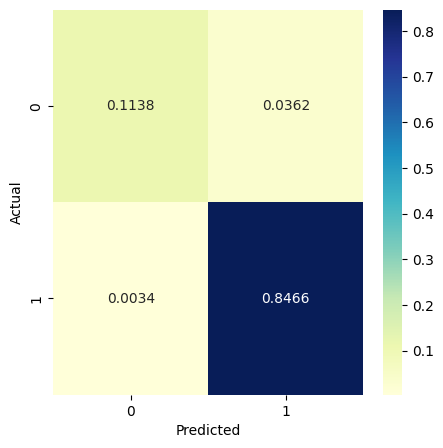

In [28]:
cm = confusion_matrix(y_test_5, y_test_pred, normalize='all')
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='.4f', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

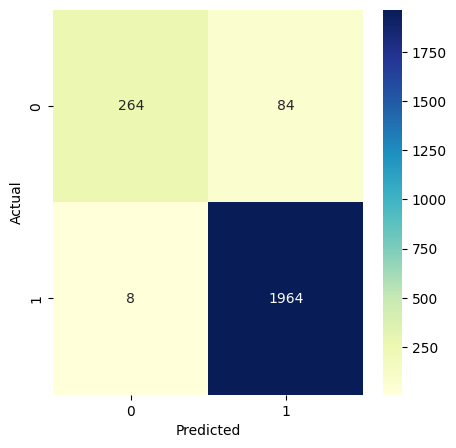

In [29]:
cm = confusion_matrix(y_test_5, y_test_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)